In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df = pd.read_csv('UN_city_pop_projections_long.csv')

In [4]:
df = df[df['Country_or_area']=='Algeria']

In [5]:
df = df.reset_index()

In [6]:
df = df.drop(columns=['index','Unnamed: 0','Region','Country_Code','City_Code','Country_or_area','City_Definition','Latitude','Longitude'])

In [7]:
df

,City,year,population
0,Annaba,1950,99.741
1,Batna,1950,13.046
2,Blida,1950,33.970
3,El Djazaïr (Algiers),1950,516.450
4,El Djelfa,1950,10.450
...,...,...,...
683,El Djazaïr (Algiers),2035,3495.835
684,El Djelfa,2035,719.812
685,Qacentina,2035,491.992
686,Sétif,2035,402.034


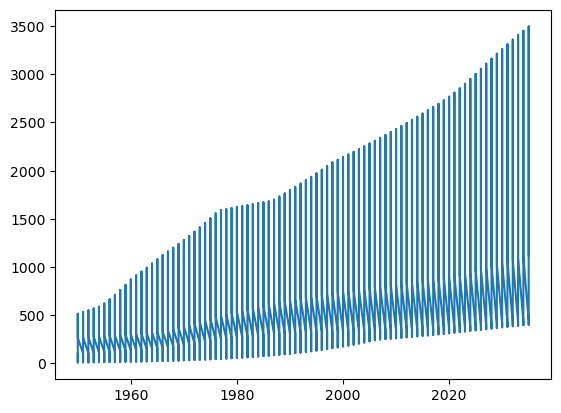

In [8]:
from matplotlib import pyplot as plt
plt.plot(df['year'],df['population'])

In [9]:
from sklearn.preprocessing import LabelEncoder
encoding  = LabelEncoder()
df['City'] = encoding.fit_transform(df[['City']])
df['City'] = encoding.fit_transform(df[['City']])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
df

,City,year,population
0,0,1950,99.741
1,1,1950,13.046
2,2,1950,33.970
3,3,1950,516.450
4,4,1950,10.450
...,...,...,...
683,3,2035,3495.835
684,4,2035,719.812
685,5,2035,491.992
686,6,2035,402.034


In [11]:

df2 = df[df['year'] <= 2023]

df2 = df2.reset_index()
df2["year"]= pd.to_datetime(df2.year, format='%Y')

In [12]:
train_df= df2.drop(columns=['index'])

In [13]:
train_df

,City,year,population
0,0,1950-01-01,99.741
1,1,1950-01-01,13.046
2,2,1950-01-01,33.970
3,3,1950-01-01,516.450
4,4,1950-01-01,10.450
...,...,...,...
587,3,2023-01-01,2901.810
588,4,2023-01-01,570.543
589,5,2023-01-01,417.768
590,6,2023-01-01,331.801


In [14]:
df3 = df[df['year'] > 2023]

df3 = df3.reset_index()
df3["year"]= pd.to_datetime(df3.year, format='%Y')

In [15]:
test_df = df3.drop(columns=['index'])

In [16]:
test_df

,City,year,population
0,0,2024-01-01,373.779
1,1,2024-01-01,352.163
2,2,2024-01-01,523.920
3,3,2024-01-01,2952.115
4,4,2024-01-01,589.697
...,...,...,...
91,3,2035-01-01,3495.835
92,4,2035-01-01,719.812
93,5,2035-01-01,491.992
94,6,2035-01-01,402.034


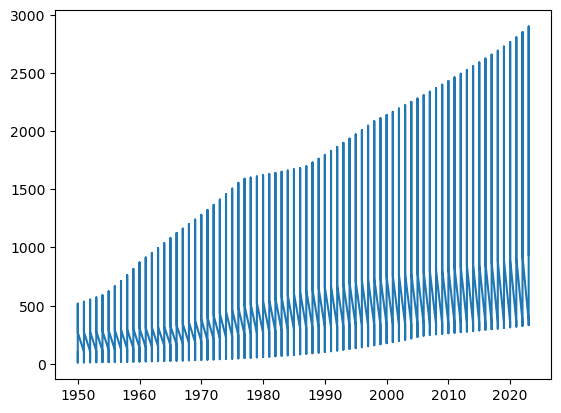

In [17]:
plt.plot(train_df['year'],train_df['population'])

In [18]:
test_population_values = test_df['population'].values

In [20]:
!pip install pmdarima
  
# Import the library
from pmdarima import auto_arima
                             # set to stepwise
  

In [21]:
 stepwise=auto_arima(train_df['population'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,
                          stepwise = True)# we don't want convergence warnings
          
# To print the summary
stepwise.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.86 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=9125.258, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=2.96 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=9123.462, Time=0.06 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=2.64 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=1.83 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=5737.791, Time=2.73 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=18.57 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=16.55 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=6.14 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=11.02 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=19.03 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=5738.045, Time=5.22 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=5737.063, Time=5.40 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  592
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood               -2848.212
Date:                             Tue, 02 May 2023   AIC                           5706.423
Time:                                     18:09:42   BIC                           5728.238
Sample:                                          0   HQIC                          5714.928
                                             - 592                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.2906      4.297      3.093      0.002       4.868      21.713
ar.L1          0.5129      0.147      3.498      0.000       0.225       0.800
ma.L1         -0.7268      0.115     -6.295      0.000      -0.953      -0.501
ar.S.L12      -1.0000      0.000  -4042.655      0.000      -1.000      -1.000
sigma2       952.7663     74.447     12.798      0.000     806.853    1098.679
===================================================================================
Ljung-Box (L1) (Q):                   3.89   Jarque-Bera (JB):               632.63
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             1.94
Prob(H) (two-sided):                  0.14   Kurtosis:                         6.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model =  SARIMAX(train_df['population'], 
                order = (1, 0, 1), 
                seasonal_order =(1, 1, 0, 12))
  
result = model.fit()
result.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          population   No. Observations:                  592
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood               -3037.484
Date:                             Tue, 02 May 2023   AIC                           6082.968
Time:                                     18:10:17   BIC                           6100.420
Sample:                                          0   HQIC                          6089.772
                                             - 592                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.036     27.865      0.000       0.929       1.070
ma.L1         -0.9997      0.037    -26.844      0.000      -1.073      -0.927
ar.S.L12      -1.0000      0.001  -1613.861      0.000      -1.001      -0.999
sigma2      2245.4949    124.219     18.077      0.000    2002.031    2488.959
===================================================================================
Ljung-Box (L1) (Q):                   1.48   Jarque-Bera (JB):               777.00
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             2.08
Prob(H) (two-sided):                  0.41   Kurtosis:                         6.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

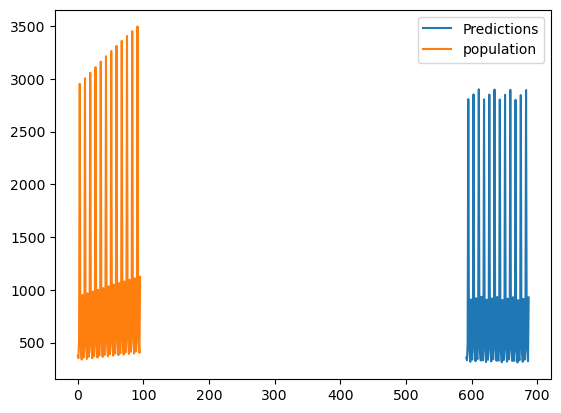

In [24]:
start = len(train_df)
end = len(train_df) + len(test_df) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test_df['population'].plot(legend = True)

In [25]:
predictions

592     358.798987
593     332.379645
594     483.769789
595    2806.984187
596     524.866947
          ...     
683    2893.333048
684     562.097862
685     409.329035
686     323.370008
687     927.547275
Name: Predictions, Length: 96, dtype: float64

In [26]:
final=pd.DataFrame({'Actual':test_population_values,'Prediction':predictions})

In [27]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(test_df["population"], predictions)
  
# Calculate mean squared error


169.00501089688282

In [28]:
# Calculate root mean squared error
mean_squared_error(test_df["population"], predictions)

28562.69370825548

<AxesSubplot:>

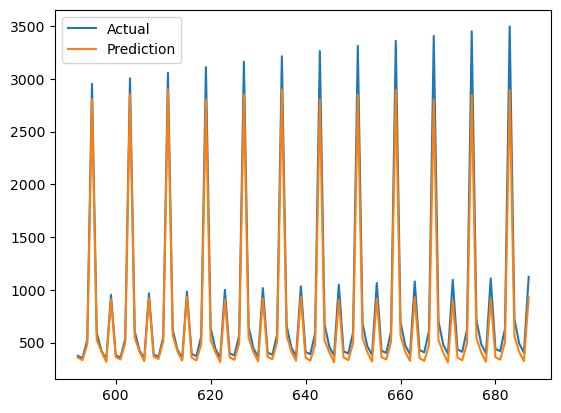

In [29]:
final.plot(legend = True)

In [30]:
final

,Actual,Prediction
592,373.779,358.798987
593,352.163,332.379645
594,523.920,483.769789
595,2952.115,2806.984187
596,589.697,524.866947
...,...,...
683,3495.835,2893.333048
684,719.812,562.097862
685,491.992,409.329035
686,402.034,323.370008
